# Visual following NHL division standings over a season

### Getting the Data

In [1]:
import pandas as pd

df = pd.DataFrame()
df= pd.read_csv("logos+data/AtlanticDivision-weeklyStandings.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Boston,Buffalo,Buffalo,Buffalo,Boston,Boston,Boston,Boston,Boston,Boston,...,Boston,Boston,Boston,Boston,Boston,Boston,Boston,Boston,Boston,Boston
1,Buffalo,Boston,Boston,Boston,Buffalo,Buffalo,Montreal,Florida,Florida,Buffalo,...,Tampa Bay,Tampa Bay,Tampa Bay,Tampa Bay,Tampa Bay,Tampa Bay,Tampa Bay,Tampa Bay,Tampa Bay,Tampa Bay
2,Detroit,Toronto,Toronto,Toronto,Florida,Toronto,Florida,Montreal,Toronto,Florida,...,Toronto,Toronto,Florida,Florida,Florida,Toronto,Toronto,Toronto,Toronto,Toronto
3,Florida,Detroit,Tampa Bay,Tampa Bay,Toronto,Florida,Toronto,Buffalo,Montreal,Montreal,...,Florida,Florida,Toronto,Toronto,Toronto,Florida,Florida,Florida,Florida,Florida
4,Montreal,Montreal,Detroit,Florida,Tampa Bay,Montreal,Buffalo,Toronto,Tampa Bay,Toronto,...,Buffalo,Buffalo,Buffalo,Montreal,Montreal,Montreal,Montreal,Montreal,Montreal,Montreal
5,Ottawa,Tampa Bay,Montreal,Montreal,Montreal,Tampa Bay,Tampa Bay,Ottawa,Buffalo,Tampa Bay,...,Montreal,Montreal,Montreal,Buffalo,Buffalo,Buffalo,Buffalo,Buffalo,Buffalo,Buffalo
6,Tampa Bay,Florida,Florida,Detroit,Detroit,Ottawa,Ottawa,Tampa Bay,Ottawa,Ottawa,...,Ottawa,Ottawa,Ottawa,Ottawa,Ottawa,Ottawa,Ottawa,Ottawa,Ottawa,Ottawa
7,Toronto,Ottawa,Ottawa,Ottawa,Ottawa,Detroit,Detroit,Detroit,Detroit,Detroit,...,Detroit,Detroit,Detroit,Detroit,Detroit,Detroit,Detroit,Detroit,Detroit,Detroit


In [2]:
from glob import glob
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import rc

from typing import Tuple, Union

In [3]:
Path = mpath.Path

def get_patch(p1: Tuple, p2: Tuple, color: Union[str, Tuple]):
    """ Returns a patch of bezier curve from one point to another
    We have 3 cases to consider depending on the x coordinate of the 2 points - p1, p2:
    1. When next point (p2) > previous point (p1)
    2. When p2 < p1
    3. When p2 == p1
    
    Depending on the case, we draw a bezier curve from the coressponding control points and then return that patch
    
    Args: 
        - p1, p2 (tuples): 2 tuples of x,y points  
        - color (str/rgba tuple): color of line 
    Returns:
        - patch (instance of mpl patch)
    """

    x1, y1 = p1; x2, y2 = p2
    
    if y2 > y1:
        patch = mpatches.PathPatch(
            Path(
                 [p1, (x1+(x2-x1)/2, y1), (x1+(x2-x1)/2, y1+(y2-y1)/2), (x1+(x2-x1)/2, y2), p2],
                 [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CURVE3, Path.CURVE3]),
            ec=color, fc='none', zorder=5)
        
    elif y2 < y1:
        patch = mpatches.PathPatch(
            Path([p1, (x1 + (x2-x1)/2, y1), (x1+(x2-x1)/2, y1+(y2-y1)/2), (x1 + (x2-x1)/2, y2), p2],
                 [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CURVE3, Path.CURVE3]),
            ec=color, fc='none', zorder=5)
        
    else:
        patch = mpatches.PathPatch(
            Path([p1, p2],
                 [Path.MOVETO, Path.LINETO]), ec=color, fc='none', zorder=5)

    return patch

def imscatter(x, y, image, ax=None, zoom=1):
    """ Function to plot the team crests (stackoverflow.com/questions/35651932/plotting-img-with-matplotlib/35651933)"""
    
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

In [5]:
### the team_names, colors and logos are in order

teams = df['0'].values

colors = ['#000000',
'#fcb514',
'#c8102e',
'#041e42',
'#a6192e',
'#010101',
'#00205b',
'#808080'
]

images = [
    "logos+data/Boston.png",
    "logos+data/Buffalo.png",
    "logos+data/Detroit.png",
    "logos+data/Florida.png",
    "logos+data/Montreal.png",
    "logos+data/Ottawa.png",
    "logos+data/Tampa Bay.png",
    "logos+data/Toronto.png",
]

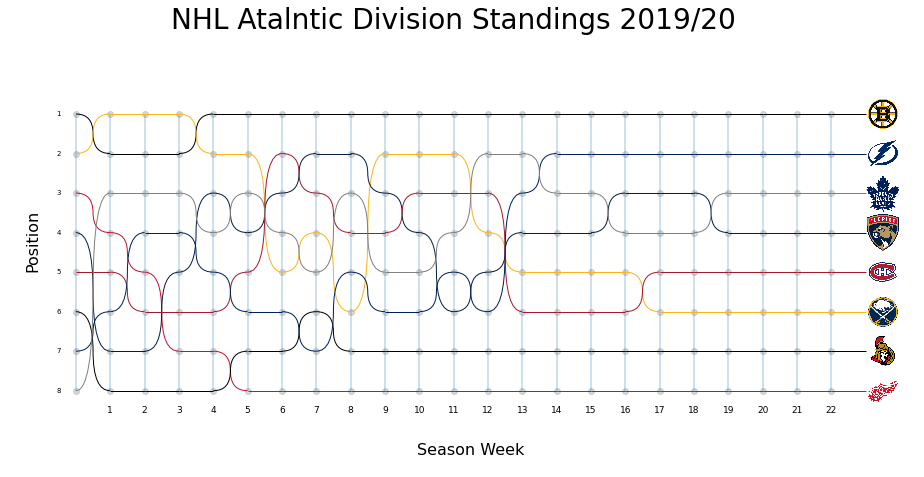

In [6]:
# rc('font',**{'family':'sans-serif','sans-serif':['Goldman Sans']})    

fig, ax = plt.subplots(figsize=(16,8))

for team_name, color, img_path in zip(teams, colors, images):
    indices = df[df == team_name].stack().index.tolist()
    coords = [(idx[1], idx[0]) for idx in indices]
    coords = [(int(coord[0]), coord[1]) for coord in coords]
    coords = sorted(coords, key=lambda x: x[0])

    ###
    for p1, p2 in zip(coords[:-1], coords[1:]):
        patch = get_patch(p1, p2, color)
        ax.add_patch(patch)
    
    imscatter(x=23.5, y=coords[-1][-1], image = img_path, ax=ax, zoom=0.075)
    
ax.set_axis_off()
ax.set(xlim=(-2,24), ylim=(-2,9))
ax.title.set(text='NHL Atalntic Division Standings 2019/20', x=.5, y=.9, ha='center', va='center', fontweight='light', fontsize=28)
ax.text(11.5, 8.5, 'Season Week', fontsize=16, va='center', ha='center')
ax.text(-1.25, 4, 'Position', rotation=90, fontsize=16, va='bottom', ha='center')

[ax.text(i, 7.5, i, ha='center', va='center', size=9) for i in range(1, 23)]
[ax.text(-0.5, i, i+1, ha='center', va='center', size=7) for i in range(8)] 

for i in range(23):
    for j in range(8):
        ax.scatter(i, j, fc='0.5', alpha=.3, zorder=1)

ax.vlines(x=list(range(23)), ymin=0, ymax=7, fc='0.5', alpha=.3, zorder=1)        
ax.invert_yaxis()